In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

import sklearn, pickle
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif,f_classif

In [26]:
print(pd.__name__)
print(pd.__version__)
print(sns.__name__)
print(sns.__version__)
print(np.__name__)
print(np.__version__)
#print(matplotlib.__version__)
print(sklearn.__name__)
print(sklearn.__version__)
sklearn.__

pandas
0.23.4
seaborn
0.9.0
numpy
1.15.1
sklearn
0.22


'sklearn'

In [27]:
! pip list

Package                            Version   
---------------------------------- ----------
absl-py                            0.7.1     
alabaster                          0.7.11    
anaconda-client                    1.7.2     
anaconda-navigator                 1.9.2     
anaconda-project                   0.8.2     
appdirs                            1.4.3     
asn1crypto                         0.24.0    
astor                              0.7.1     
astroid                            2.0.4     
astropy                            3.0.4     
atomicwrites                       1.2.1     
attrs                              18.2.0    
Automat                            0.7.0     
Babel                              2.6.0     
backcall                           0.1.0     
backports.shutil-get-terminal-size 1.0.0     
beautifulsoup4                     4.6.3     
bitarray                           0.8.3     
bkcharts                           0.2       
blaze                             

# Dataset description

In [2]:
churn = pd.read_csv('telecom_churn_dataset/churn_dataset.csv')
churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
print("Percentage of values per feature:\n" )
counts = churn.count()
for col,t in zip(counts.index,counts):
    perc = (t/len(churn))*100
    print(col,': ',round(perc,2),'%')

Percentage of values per feature:

state :  100.0 %
account length :  100.0 %
area code :  100.0 %
phone number :  100.0 %
international plan :  100.0 %
voice mail plan :  100.0 %
number vmail messages :  100.0 %
total day minutes :  100.0 %
total day calls :  100.0 %
total day charge :  100.0 %
total eve minutes :  100.0 %
total eve calls :  100.0 %
total eve charge :  100.0 %
total night minutes :  100.0 %
total night calls :  100.0 %
total night charge :  100.0 %
total intl minutes :  100.0 %
total intl calls :  100.0 %
total intl charge :  100.0 %
customer service calls :  100.0 %
churn :  100.0 %


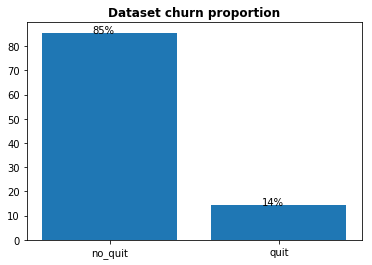

In [6]:
no_quit = churn[churn['churn']==False]

perc_no_quit = (len(no_quit)/len(churn))*100
perc_quit = ((len(churn)-len(no_quit))/len(churn)) *100

plot = plt.bar(x=['no_quit','quit'],height=[perc_no_quit,perc_quit])
plt.title('Dataset churn proportion',fontweight='bold')

for i in plot.patches:
    plt.text(x =i.get_x()+0.3,y=i.get_height(),s = "{}{}".format(int(i.get_height()),'%'))

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area code,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number vmail messages,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total day minutes,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total day calls,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total day charge,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total eve minutes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total eve calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total eve charge,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total night minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.999999,NaN,NaN,NaN,NaN,NaN


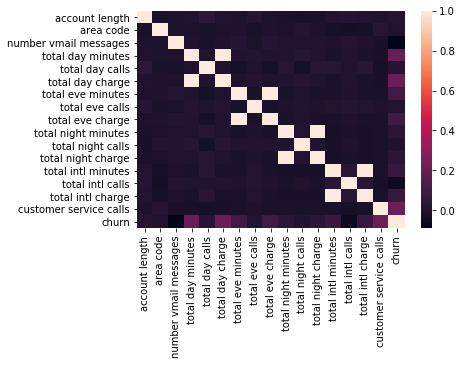

In [7]:
corr_m = churn.corr()
sns.heatmap(corr_m)

corr_m[corr_m>0.8]

# Dataset preprocessing

In [8]:
print('state unique values',len(np.unique(churn.state.values)))

print('phone number unique values',len(np.unique(churn['phone number'].values)))
churn = churn.drop(columns=['phone number'])

state unique values 51
phone number unique values 3333


In [9]:
# Create correlation matrix
corr_matrix = churn.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

churn.drop(columns=to_drop,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

le = LabelEncoder()
le = le.fit(np.unique(churn.state.values))

churn['state'] = le.transform(churn['state'])


lb = LabelBinarizer()

churn['international plan'] = lb.fit_transform(churn['international plan'])
churn['voice mail plan'] = lb.fit_transform(churn['voice mail plan'])

churn.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
state                     3333 non-null int32
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int32
voice mail plan           3333 non-null int32
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
customer service calls    3333 non-null int64
churn                     3333 non-null bool
dtypes: bool(1), float64(4), int32(3), int64(8)
memory usage: 354.9 KB


# Training

In [12]:
X = np.array(churn.drop(columns=['churn']))
X = preprocessing.scale(X)

y = np.array(churn['churn'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

<BarContainer object of 2 artists>

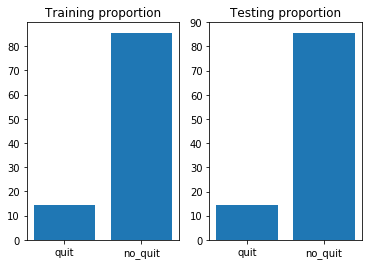

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2)

perc_quit = (np.count_nonzero(y_train)/len(y_train))*100
ax1.set_title('Training proportion')
ax1.bar(x=['quit','no_quit'],height=[perc_quit,100-perc_quit])


perc_quit = (np.count_nonzero(y_test)/len(y_test))*100
ax2.set_title('Testing proportion')
ax2.bar(x=['quit','no_quit'],height=[perc_quit,100-perc_quit])



In [14]:
from sklearn.experimental import enable_hist_gradient_boosting 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

from matplotlib.pylab import rcParams
from sklearn import tree

import sklearn.metrics as metrics

import matplotlib.pyplot as plt

In [15]:
all_data = pickle.load(open('pickle_files/churn_all_data_2020-01-06_16-01.pickle','rb'))

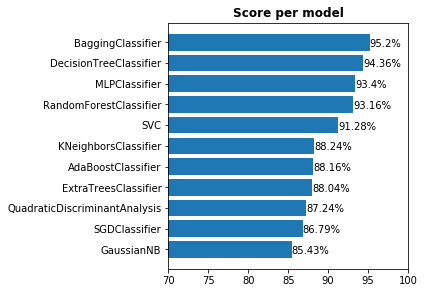

In [16]:
scores = []
names = []

for clf in all_data:
    scores.append(clf.best_score_)
    names.append(str(clf.best_estimator_).split('(')[0])

best_estimators = pd.DataFrame()
best_estimators['Name']=names
best_estimators['Score']=pd.Series(scores) *100
best_estimators.sort_values(by='Score',inplace=True)

plot = plt.barh(y = np.arange(len(names)), width = best_estimators['Score'], tick_label = best_estimators['Name'])
plt.axis(xmin = 70.0)
plt.tight_layout()
plt.title('Score per model',fontweight='bold')

for i in plot.patches:
    plt.text(y=i.get_y()+0.2,x=i.get_width(),s='{}%'.format(round(i.get_width(),2)))


In [17]:
estimators = []

for data,name in zip(all_data,names):
    estimators.append((name,data.best_estimator_))

voting_clf = VotingClassifier(estimators)
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.9184652278177458

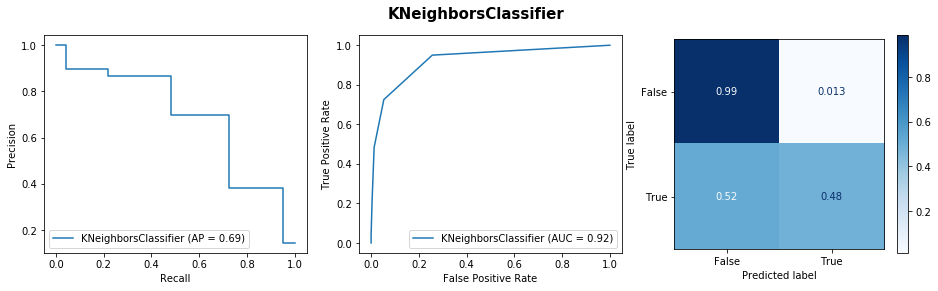

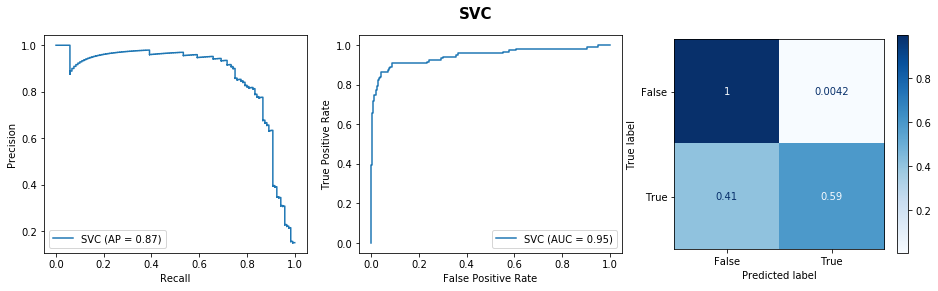

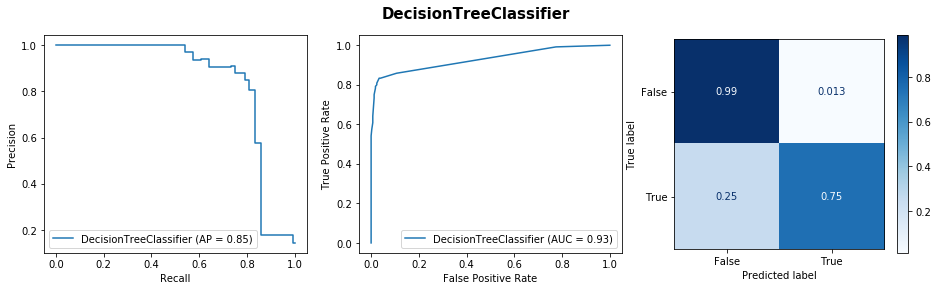

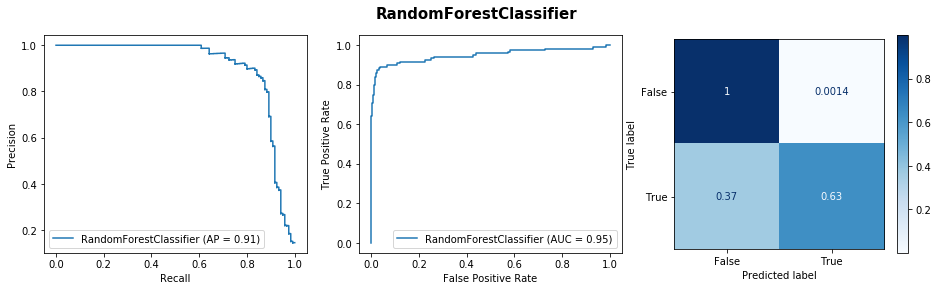

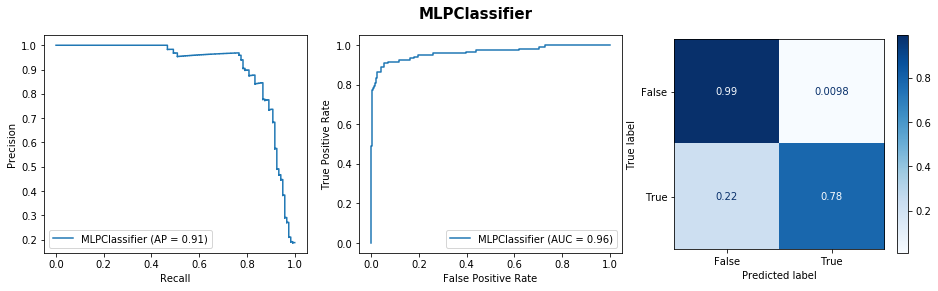

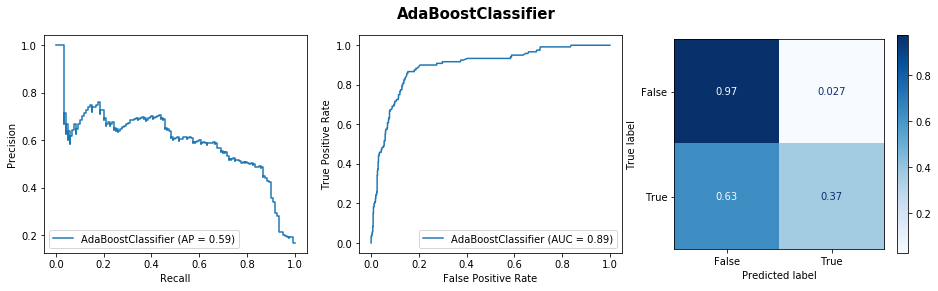

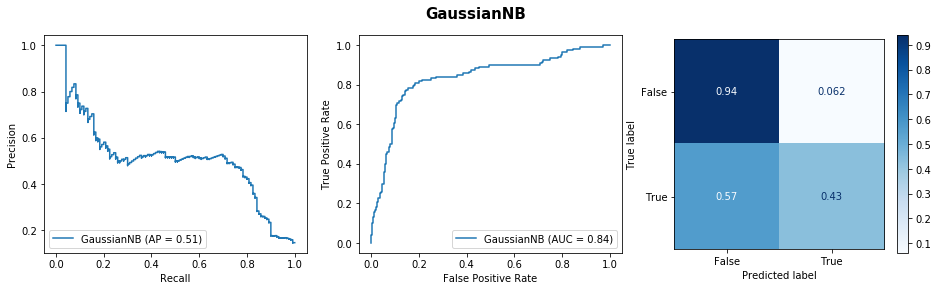

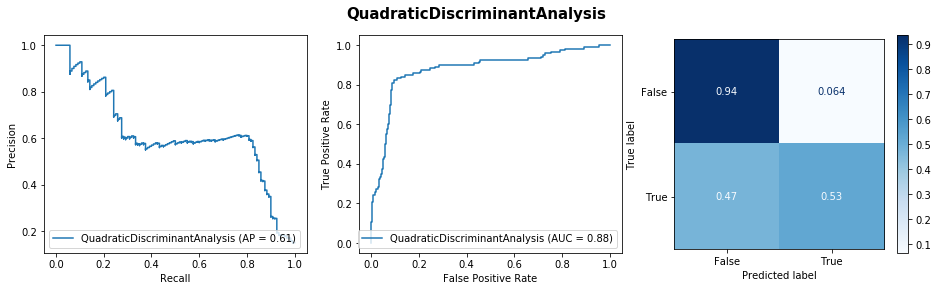

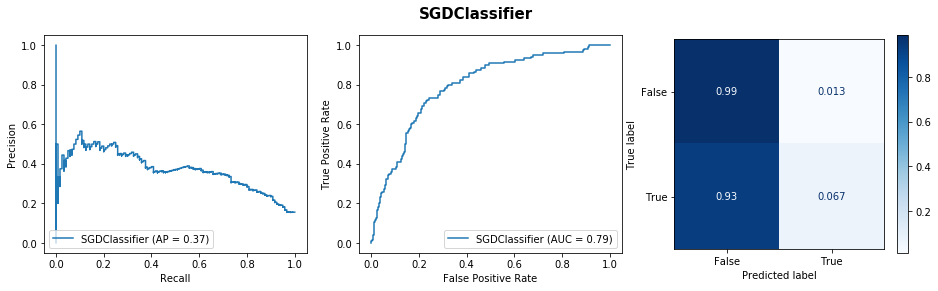

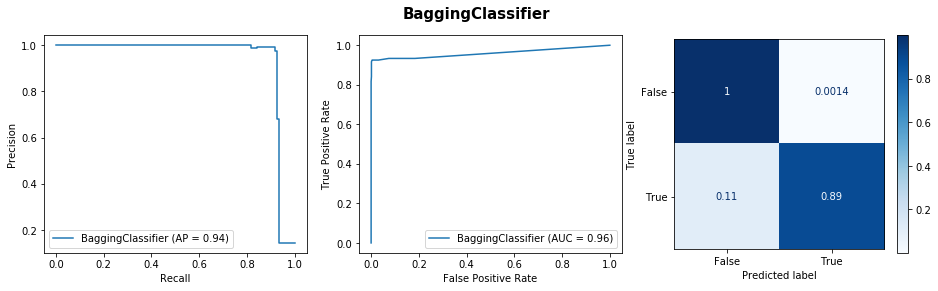

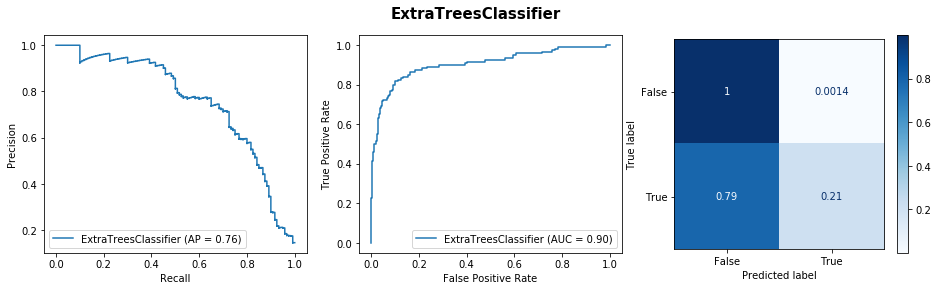

In [18]:
for clf in estimators:
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
    
    fig.suptitle(clf[0],fontsize=15,fontweight='bold')
    clf = clf[1]
    
    metrics.plot_precision_recall_curve(clf,X_test,y_test,ax=ax1)    
    metrics.plot_roc_curve(clf,X_test,y_test,ax=ax2)
    metrics.plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues,normalize='true',ax=ax3)

# Focusing on trees

In [19]:
best_trees_estimators = pickle.load(open('pickle_files/churn_trees_estimators_2020-01-06_16-01.pickle','rb'))

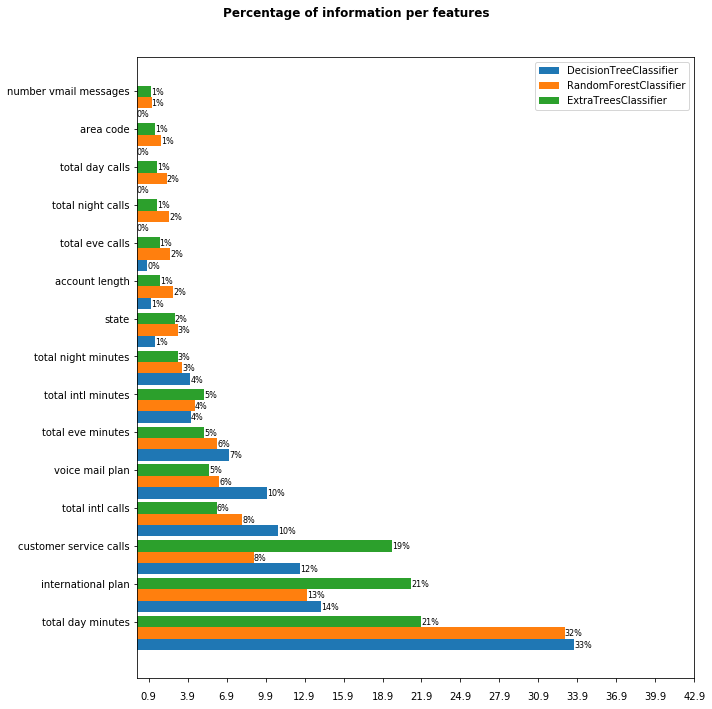

In [20]:
fig,axis = plt.subplots()
fig.suptitle('Percentage of information per features',fontweight='bold')

x = np.arange((len(churn.columns)-1)*3,step =3)  # the label locations
width = 0.9  # the width of the bars

names = []
n = 0 
axis.set_xticks(x)


for clf in best_trees_estimators:
    
    coord = x + n*width
    n = n+1
    
    feature_importance = pd.DataFrame(index=churn.columns)
    feature_importance.drop(index=['churn'],inplace=True)
    
    name = str(clf[1]).split('(')[0]
    names.append(name)
    
    clf = clf[1]
    clf = clf.fit(X_train,y_train)
    
    
    feature_importance['Percentage']= clf.feature_importances_ * 100
    feature_importance.sort_values(by='Percentage',inplace=True,ascending=False)

    
    axis.barh(y = coord,tick_label=feature_importance.index,width=feature_importance['Percentage'],height=width,label=name)

    
for i in axis.patches:
    axis.text(x = i.get_width(),y = i.get_y()+0.2,s = "{}{}".format(int(i.get_width()),'%'),fontsize=8)
    

plt.xticks(x+width)
axis.legend()
axis.tick_params(axis='x', which='major', pad=10)
fig.set_size_inches(h=10,w=10)
plt.tight_layout(rect=[0, 0, 1,0.93])
